# Python for Data Science and Analytics
### Day Two (Part 5): Solution Code
* **Instructor:** John Sandall
* **Company:** EY
* **Date:** Friday 15th February 2019
* **Contact:** john@coefficient.ai / @john_sandall

---

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn import datasets, ensemble, model_selection, neighbors, metrics, tree
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(0)

## Lab: Build a classifier!
First, load the iris dataset into pandas.

In [2]:
# Load iris data
# More info: https://en.wikipedia.org/wiki/Iris_flower_data_set
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Add target col from iris_data object
iris['target'] = iris_data.target

iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [3]:
iris.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

Visualise the relationship between the different species in terms of petal length vs petal width.

In [4]:
# We can then create a new column by mapping each target number (0, 1, 2) to colours (r, g, b)
map_colours = {0: 'r', 1: 'g', 2: 'b' }
iris['ctarget'] = iris['target'].map(map_colours)

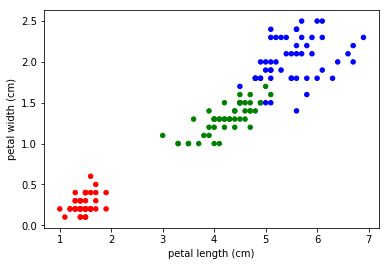

In [5]:
# Visualise
iris.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=iris.ctarget)

### Demo: Simple Classifier

In [6]:
# Super simple classifier, will get red points (0), but will label all green (1) & blue (2) points with a "1"
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

iris['predictions'] = iris.apply(my_classifier, axis=1)
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target ctarget  predictions  
0       0       r            0  
1       0       r            0  
2       0       r            0  
3       0       r            0  
4       0       r            0

In [7]:
# Accuracy = "what percent were correctly predicted?"
len(iris[iris.target == iris.predictions]) / len(iris)

0.6666666666666666

### Your turn...build a better classifier!

1. Explore the iris dataset and build a function that classifies each data point. Use if-else statements and pandas functions only.
2. Measure the accuracy of your classifier using the accuracy calculation above ("total correct over total samples").
3. Your classifier should be able to:
  - Get one class label 100% correct (one type of iris is easily distinguishable from the other two).
  - Accurately predict the majority of the other two classes with some error (note: the samples for the remaining class labels are a little intertwined, so you may need to generalise).
  
Additional questions to think about:
  - How simple could the if-else classifier be while remaining relatively accurate?
  - How complicated could our if-else classifier be and remain completely accurate? How many if-else statements would you need, or nested if-else statements, in order to get the classifier 100% accurate? (e.g. the classifier above uses two if-else statements).
  - Which if-else classifier would work better against iris data that it hasn't seen? Why is that the case?

In [8]:
# Starter code (work on improving this classifier)
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

iris['predictions'] = iris.apply(my_classifier, axis=1)
"Accuracy = ", len(iris[iris.target == iris.predictions]) / len(iris)

('Accuracy = ', 0.6666666666666666)

In [9]:
# Solution code
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 5 and row['petal width (cm)'] < 1.675:
        return 1
    else:
        return 2

iris['predictions'] = iris.apply(my_classifier, axis=1)
"Accuracy = ", len(iris[iris.target == iris.predictions]) / len(iris)

('Accuracy = ', 0.98)

## Lab: Decision Trees in scikit-learn

In [10]:
# Construct feature matrix & outcome vector
X = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris.target

# Fit the model
model = tree.DecisionTreeClassifier().fit(X, y)

# Evaluate the model
predictions = model.predict(X)
print("Accuracy =", sum(y == predictions) / len(iris))

Accuracy = 1.0


## Lab: Cross-Validation
Is this overfitting?

In [11]:
# We could use the train_test_split function in sklearn to do this
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
sum(y_pred == y_test) / len(y_test)

1.0

In [12]:
# Let's also evaluate this using 5-fold cross-validation.
cv_accuracy = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Mean cross-validated accuracy =", np.mean(cv_accuracy))

Mean cross-validated accuracy = 0.9666666666666668


Even when tested on unseen data, this model gets 96% accuracy. It would be good to see what this decision tree looks like, however we need to install the "GraphViz" software first.

## Lab: Installing GraphViz

### Option 1: Use conda
You can now install the GraphViz binaries and the associated Python package all in one go using Anaconda:

Run this in a fresh Anaconda Prompt:
`conda install python-graphviz`

Run this to check this has installed correctly:

In [13]:
!dot -V

dot - graphviz version 2.38.0 (20140413.2041)


If this displays something like `dot - graphviz version 2.40.1 (20161225.0304)`, you're done and can safely proceed to the next section.

### Option 2: If the above fails...

We will be using the [GraphViz](http://www.graphviz.org/) software today. Note this is separate to the [GraphViz Python library](https://pypi.python.org/pypi/graphviz), although the GraphViz Python library is available via e.g. `pip install graphviz` or `conda install graphviz`, **installing the GraphViz Python library is not necessary** for today. The Python library is purely a way to use GraphViz via Python. Below we don't do this! We use GraphViz directly via the **`system`** command (equivalent to executing from your command-line).

Therefore, you may need to download/install GraphViz. Checking if GraphViz is installed is easy, just type this into your command-line:

    dot -V

Alternatively, run this code block.

In [14]:
!dot -V

dot - graphviz version 2.38.0 (20140413.2041)


In [15]:
import subprocess

p = subprocess.Popen('dot -V', shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in p.stdout.readlines():
    print(line)

# Should print something like:
#
# dot - graphviz version 2.38.0 (20140413.2041)
#
# If it doesn't, you don't have GraphViz installed!

b'dot - graphviz version 2.38.0 (20140413.2041)\n'


#### Installation instructions for Windows
If you're reading all the various notes on the download page, and proficient with Googling the various problems as they come up, you might've been able to figure it out for yourself. Why the GraphViz team doesn't make this easier, I have no idea.

1. Download and install from here: http://www.graphviz.org/Download_windows.php
2. Read the various notes & warnings on that page, especially if you're on an OS that's mentioned.
3. You'll notice it says
  > If you wish to use the command-line interface to Graphviz or are using some other program that calls a Graphviz program, you will need to set the PATH variable yourself.
4. So we need to set the PATH variable yourself. A quick Google search for "graphviz set path variable" gives you this: http://enterprise-architecture.org/downloads?id=208 which tells us:
  > Create an environment variable GRAPHVIZ_DOT and point it to the DOT executable.
  > For example: d:\example\dot.exe 
  > Consult your Windows documentation for help setting environment variables in your version of Windows.
Your path will be something like `c:\Program Files\Graphviz*\dot.exe` or `c:\Program Files (x86)\Graphviz*\dot.exe` or `c:\Program Files\Graphviz*\bin\dot.exe`...just find and check the exact location of your `dot.exe` file. 
5. To find out how to create environment variables, this should be handy: https://www.java.com/en/download/help/path.xml
6. Once you're done, check it's installed correctly by executing **`dot -V`** from your command-line.

#### Don't forget to reload the Python kernel in Jupyter once you have it installed! (You may need to restart your computer too.)

## Lab: Visualising Decision Trees in scikit-learn

Let's import some useful functionality.

In [16]:
# We'll need the system command to call out to the CLI from Python
from os import system

# We can visualise an image using a programmatically
# generated filename using the Image command
from IPython.display import Image

In [17]:
# Let's visualise the decision tree model we created previously
filename = 'tree.png'
dotfile = open("tree.dot", 'w')
tree.export_graphviz(model, out_file=dotfile, feature_names=X.columns)
dotfile.close()
system("dot -Tpng tree.dot -o {0}".format(filename))

0

Finally, let's visualise our fitted tree!

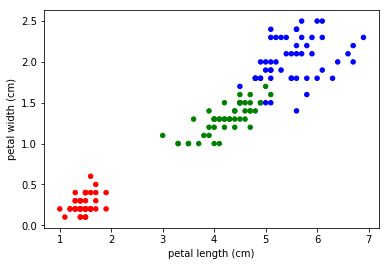

In [18]:
# Visualise
iris.plot('petal length (cm)', 'petal width (cm)',
          kind='scatter', c=iris.ctarget)

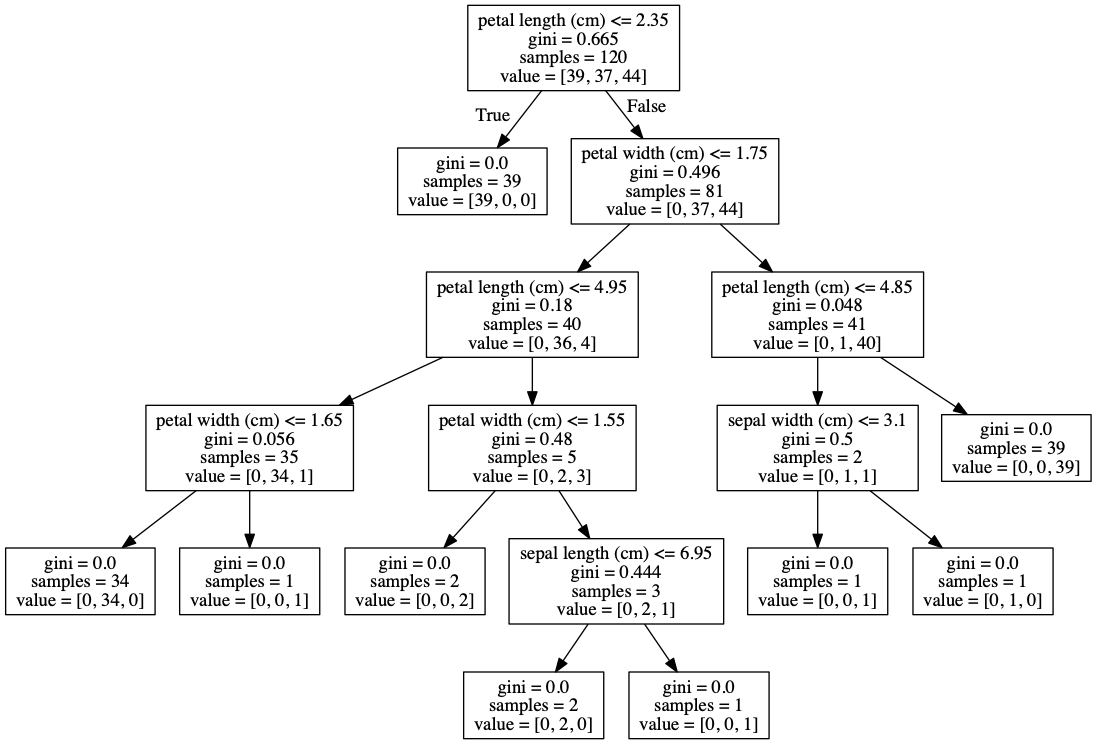

In [19]:
Image(filename, width=800)

## Lab: Avoiding Overfitting in Decision Trees

In [20]:
# Let's wrap the tree visualisation code into a helper function
def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    tree.export_graphviz(model, out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename))  # comment out this line if you don't have GraphViz yet

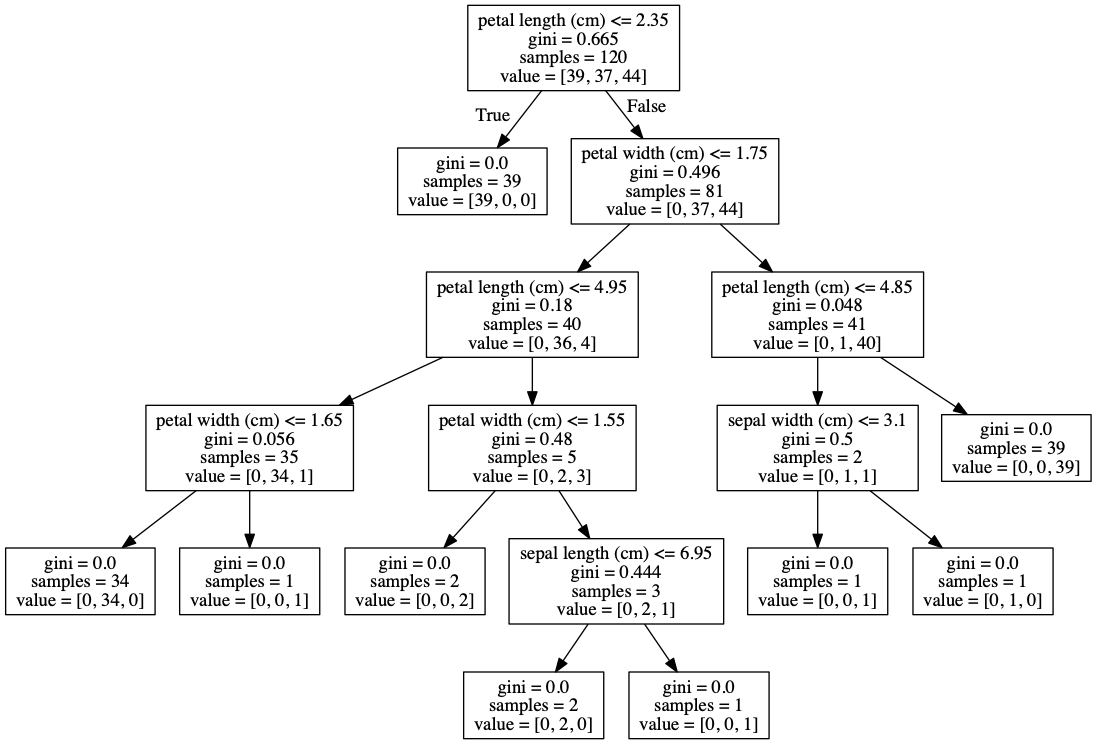

In [21]:
# Check it works
build_tree_image(model)
Image('tree.png', width=800)

#### Instructions
1. You can control for overfitting in decision trees by adjusting one of the following parameters:
  - `max_depth`:  Control the maximum number of question nodes.
  - `min_samples_in_leaf`:  Control the minimum number of records in each leaf node.

2. Test each of these parameters below. Note how the visualised tree changes as you vary these.
3. Add in the cross-validated accuracy metric from earlier. Which parameter settings gives you the highest generalised accuracy? You may wish to look at the other parameters you can vary on the DecisionTree documentation here: scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Mean cross-validated accuracy = 0.9600000000000002


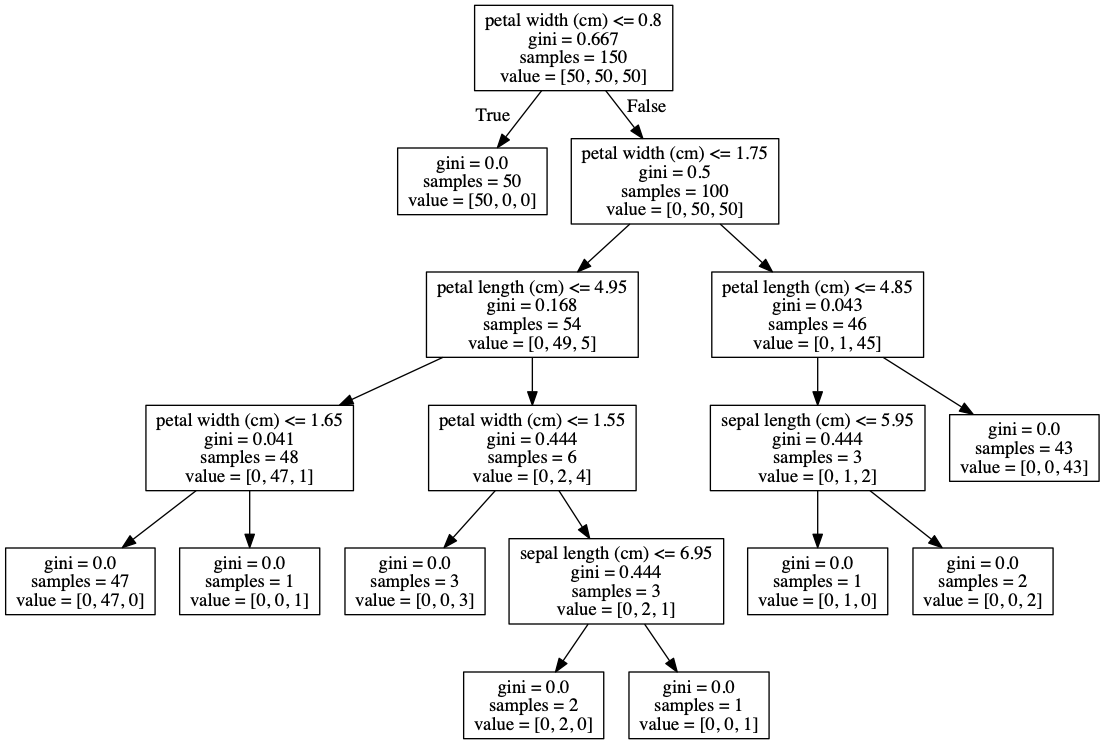

In [22]:
# Control for overfitting in the decision tree model by adjusting the maximum number of questions
# (max_depth) or the minimum number of records in each final node (min_samples_leaf).
max_depth = None
min_samples_leaf = 1
model = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
model.fit(X, y)

filename = "tree-max_depth_{0}-min_samples_leaf_{1}.png".format(max_depth, min_samples_leaf)
build_tree_image(model, filename='./' + filename)
cv_accuracy = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Mean cross-validated accuracy =", np.mean(cv_accuracy))
Image(filename, width=300)

## Lab: Tuning Models With Grid Search

In [23]:
# Let's use GridSearch with 5-fold CV to optimise our model for generalisation accuracy
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(),
    param_grid={
        'max_depth': np.arange(1, 10),
    },
    cv=5,
    scoring='accuracy'
)
gs.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
params = gs.cv_results_['params']
params

[{'max_depth': 1},
 {'max_depth': 2},
 {'max_depth': 3},
 {'max_depth': 4},
 {'max_depth': 5},
 {'max_depth': 6},
 {'max_depth': 7},
 {'max_depth': 8},
 {'max_depth': 9}]

In [25]:
score = gs.cv_results_['mean_test_score']
score

array([0.66666667, 0.93333333, 0.96      , 0.96666667, 0.96666667,
       0.96      , 0.96666667, 0.96      , 0.96      ])

#### Exercises
1. Create a pandas dataframe containing two columns (score and params), and assign it into a variable called `grid`.
2. Use `.apply()` with a custom function to add a new column containing the value of `max_depth`.
3. Use `sns.pointplot()` to visualise how the mean accuracy changes with varying `max_depth`.
4. Add `min_samples_leaf` to the `param_grid` dictionary above, and re-run the grid search.
5. Re-run your code for turning `grid_scores_` into a dataframe, adding a new column for `min_samples_leaf`.
6. Use `sns.catplot()` with argument `kind='point'` and using the `hue` argument to display how generalised accuracy varies with _both_ `max_depth` _and_ `min_samples_leaf`.
7. What are the parameter settings for your best model? (Tip: Look at your `grid` dataframe, or the `gs.best_params_` attribute.)
8. Visualise your best decision tree model using GraphViz (tip: look at the `gs.best_estimator_` attribute).

In [26]:
# 1. Turn `gs.cv_results_` into a pandas dataframe containing two columns
#    (score and params), and assign it into a variable called `grid`.
grid = pd.DataFrame({'score': score, 'params': params})
grid

score            params
0  0.666667  {'max_depth': 1}
1  0.933333  {'max_depth': 2}
2  0.960000  {'max_depth': 3}
3  0.966667  {'max_depth': 4}
4  0.966667  {'max_depth': 5}
5  0.960000  {'max_depth': 6}
6  0.966667  {'max_depth': 7}
7  0.960000  {'max_depth': 8}
8  0.960000  {'max_depth': 9}

In [27]:
# 2. Use `.apply()` with a custom function to add a new column containing the value of `max_depth`.
grid['max_depth'] = grid['params'].apply(lambda x: x['max_depth'])
grid

score            params  max_depth
0  0.666667  {'max_depth': 1}          1
1  0.933333  {'max_depth': 2}          2
2  0.960000  {'max_depth': 3}          3
3  0.966667  {'max_depth': 4}          4
4  0.966667  {'max_depth': 5}          5
5  0.960000  {'max_depth': 6}          6
6  0.966667  {'max_depth': 7}          7
7  0.960000  {'max_depth': 8}          8
8  0.960000  {'max_depth': 9}          9

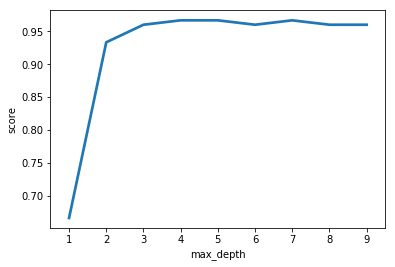

In [28]:
# 3. Use `sns.pointplot()` to visualise how the mean accuracy changes with varying `max_depth`.
sns.pointplot(x='max_depth', y='score', data=grid, markers='')

In [29]:
# 4. Add `min_samples_leaf` to the `param_grid` dictionary above, and re-run the grid search.
gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(),
    param_grid={
        'max_depth': np.arange(1, 30),
        'min_samples_leaf': np.arange(1, 10)
    },
    cv=5,
).fit(X, y)

In [30]:
# 5. Re-run your code for creating a dataframe, adding a new column for `min_samples_leaf`.
grid = pd.DataFrame(gs.cv_results_['params'])
grid['score'] = gs.cv_results_['mean_test_score']
grid.head()

max_depth  min_samples_leaf     score
0          1                 1  0.666667
1          1                 2  0.666667
2          1                 3  0.666667
3          1                 4  0.666667
4          1                 5  0.666667

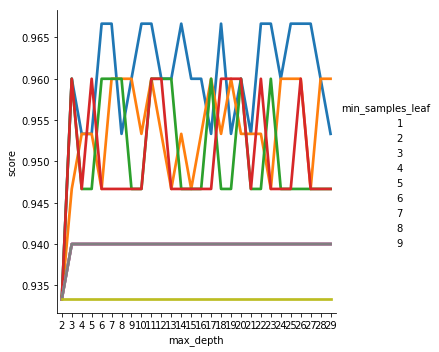

In [31]:
# 6. Use `sns.catplot()` with argument `kind='point'` and using the `hue` argument to display how
#     generalised accuracy varies with _both_ `max_depth` _and_ `min_samples_leaf`.
sns.catplot(x='max_depth', y='score', kind='point', hue='min_samples_leaf',
            markers='', data=grid[grid.score > .9])

In [32]:
# 7. What are the parameter settings for your best model? (Tip: Look at your `grid` dataframe, or the `gs.best_estimator_` attribute.)
gs.best_params_

{'max_depth': 6, 'min_samples_leaf': 1}

In [33]:
grid.sort_values('score', ascending=False).head(1)

max_depth  min_samples_leaf     score
234         27                 1  0.966667

In [34]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

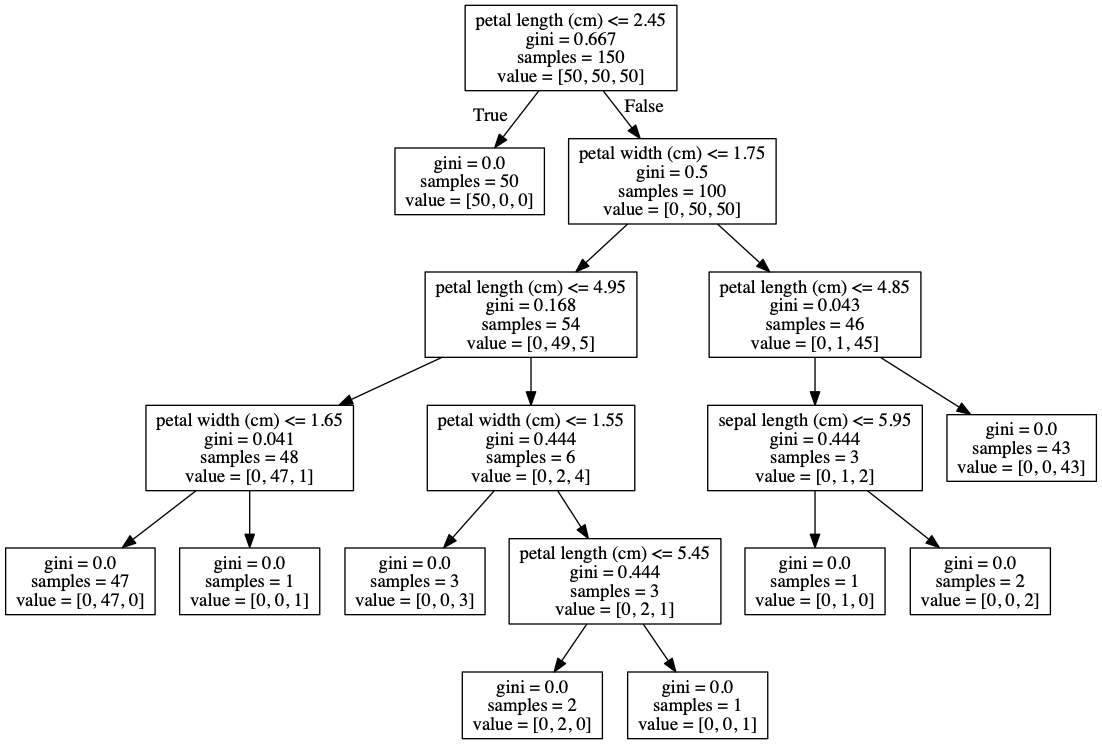

In [35]:
# 8. Visualise your best decision tree model using GraphViz.
model = gs.best_estimator_.fit(X, y)
filename = 'best_model.png'
build_tree_image(model, filename='./' + filename)
Image(filename, width=600)

## Lab: Random Forests

In [36]:
# Let's try a default random forest
model = ensemble.RandomForestClassifier().fit(X, y)
np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))

0.9533333333333334

In [37]:
# Extracting importance of features
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values(by='Importance Score', inplace=True, ascending=False)

features_df.head()

Features  Importance Score
3   petal width (cm)          0.528388
2  petal length (cm)          0.296644
0  sepal length (cm)          0.149288
1   sepal width (cm)          0.025680

#### Exercises
1. Increase the number of trees (`n_estimators`) used in the random forest. How does this improve predictive performance?
2. Try re-running your grid search code for the random forest model. Can you beat your previous accuracy on this dataset?

In [38]:
gs = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid={
        'n_estimators': np.arange(1, 50),
        'max_depth': [2, 5, 10]
    },
    cv=5,
).fit(X, y)

In [39]:
grid = pd.DataFrame(gs.cv_results_['params'])
grid['score'] = gs.cv_results_['mean_test_score']
grid.head()

max_depth  n_estimators     score
0          2             1  0.840000
1          2             2  0.946667
2          2             3  0.906667
3          2             4  0.960000
4          2             5  0.933333

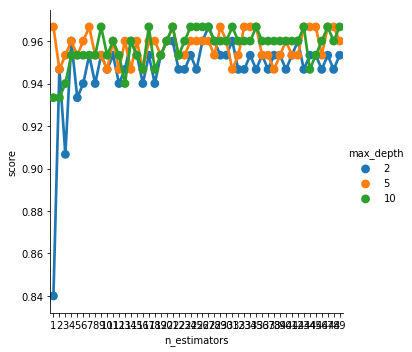

In [40]:
sns.catplot(x='n_estimators', y='score', kind='point', hue='max_depth', data=grid)

In [41]:
gs.best_params_

{'max_depth': 2, 'n_estimators': 27}

In [42]:
model = gs.best_estimator_.fit(X, y)
np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))

0.9466666666666667

## Lab: Putting it all together

In [43]:
# Load breast cancer data
breast_cancer_data = datasets.load_breast_cancer()
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [44]:
breast_cancer = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer['target'] = breast_cancer_data.target
breast_cancer.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension   ...    worst texture  worst perimeter  worst area  \
0                 0.07871   ...            17.33           184.60      2019.0   
1                 0.05667   ...            23.41           158.80      1956.0   
2                 0.05999   ...            25.53           152.50      1709.0   
3                 0.09744   ...            26.50            98.87       567.7   
4                 0.05883   ...            16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [45]:
breast_cancer.shape

(569, 31)

This suggests that the target "0" means "malignant" and "1" means "benign":

In [46]:
# "Class Distribution: 212 - Malignant, 357 - Benign"
breast_cancer.target.value_counts()

1    357
0    212
Name: target, dtype: int64

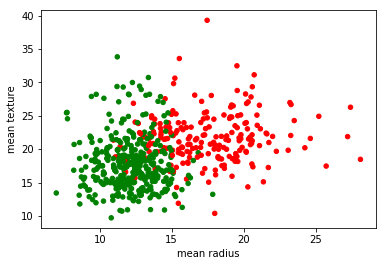

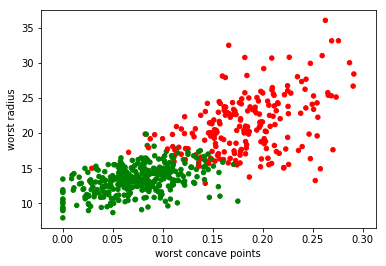

In [47]:
# Map colours to the target numbers
map_colours = {0: 'r', 1: 'g'}
breast_cancer['ctarget'] = breast_cancer['target'].map(map_colours)

# Visualise for first two features in dataset
breast_cancer.plot('mean radius', 'mean texture', kind='scatter', c=breast_cancer.ctarget)

# These two features separate out the classes a little more
breast_cancer.plot('worst concave points', 'worst radius', kind='scatter', c=breast_cancer.ctarget)

#### Exercise
Use everything you've learned so far to solve this problem for maximum generalised accuracy.

In [48]:
features_to_use = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                   'mean smoothness', 'mean compactness', 'mean concavity',
                   'mean concave points', 'mean symmetry', 'mean fractal dimension',
                   'radius error', 'texture error', 'perimeter error', 'area error',
                   'smoothness error', 'compactness error', 'concavity error',
                   'concave points error', 'symmetry error', 'fractal dimension error',
                   'worst radius', 'worst texture', 'worst perimeter', 'worst area',
                   'worst smoothness', 'worst compactness', 'worst concavity',
                   'worst concave points', 'worst symmetry', 'worst fractal dimension']
X = breast_cancer[features_to_use]
y = breast_cancer.target

In [49]:
# Let's use the Random Forest classifier
model = ensemble.RandomForestClassifier().fit(X, y)

# What's the 5-fold CV accuracy using all features and default model settings?
np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))

0.9491650634859562

In [50]:
# Notice that this number changes due to random elements of the algorithm.
np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))

0.9526433243555215

In [51]:
np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))

0.9597229703732204

Let's therefore do our 5-fold cross-validation three times and take an average, for a more robust validation metric.

In [52]:
def validate_model(model, X, y):
    accuracy_1 = np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))
    accuracy_2 = np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))
    accuracy_3 = np.mean(model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy'))
    return np.mean([accuracy_1, accuracy_2, accuracy_3])

In [53]:
validate_model(model, X, y)

0.9521046556367834

Default RF model with all features gets us to around 95.21% accuracy. Let's try optimising features, then optimise the model.

In [54]:
# Extracting importance of features
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values(by='Importance Score', inplace=True, ascending=False)

features_df.head(10)

Features  Importance Score
22       worst perimeter          0.289003
27  worst concave points          0.182672
20          worst radius          0.162493
23            worst area          0.147716
6         mean concavity          0.019499
26       worst concavity          0.019281
7    mean concave points          0.016025
5       mean compactness          0.014841
24      worst smoothness          0.012280
11         texture error          0.011846

We're going to apply a VERY simplistic approach to feature selection for now, as follows:
1. Go through the above list in order, adding one feature at a time.
2. Evaluate the model's CV accuracy.
3. Stop when we find an optimum.

Note that we run each model several times to try account for the variability in cross-validation.

In [55]:
out = []
for i in range(len(features_df)):
    features_to_use = features_df.Features.values[:i+1]
    X = breast_cancer[features_to_use]
    y = breast_cancer.target
    model = ensemble.RandomForestClassifier().fit(X, y)
    accuracy = validate_model(model, X, y)
    out.append([i+1, accuracy])

In [56]:
results_df = pd.DataFrame(out, columns=['n_features', 'accuracy'])
results_df.head()

n_features  accuracy
0           1  0.884771
1           2  0.927408
2           3  0.927480
3           4  0.935668
4           5  0.938017

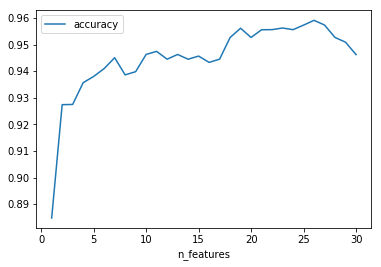

In [57]:
results_df.plot(x='n_features', y='accuracy')

In [58]:
results_df.sort_values(by='accuracy', ascending=False).head()

n_features  accuracy
25          26  0.959123
26          27  0.957353
24          25  0.957322
22          23  0.956234
18          19  0.956152

Here, the optimal number of features is around 18 features, which gives a model accuracy of 96.44%.

In [59]:
# Keep these features fixed now
features_to_use = features_df.Features.values[:18]
X = breast_cancer[features_to_use]
y = breast_cancer.target
features_to_use

array(['worst perimeter', 'worst concave points', 'worst radius',
       'worst area', 'mean concavity', 'worst concavity',
       'mean concave points', 'mean compactness', 'worst smoothness',
       'texture error', 'mean perimeter', 'worst fractal dimension',
       'area error', 'worst compactness', 'mean smoothness',
       'concave points error', 'compactness error', 'worst texture'],
      dtype=object)

Now optimise the random forest model itself.

In [60]:
# Optimise n_estimators
gs = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid={
        'n_estimators': np.arange(start=1, stop=100)
    },
    cv=5,
).fit(X, y)

In [61]:
grid = pd.DataFrame(gs.cv_results_['params'])
grid['score'] = gs.cv_results_['mean_test_score']

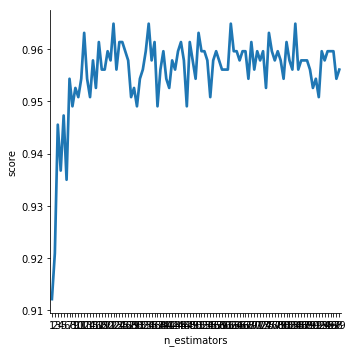

In [62]:
sns.catplot(x='n_estimators', y='score', kind='point', markers='', data=grid)

In [63]:
gs.best_params_

{'n_estimators': 22}

In [64]:
model = gs.best_estimator_.fit(X, y)
validate_model(model, X, y)

0.955675259715275

{'max_depth': 21}


0.9579530588687956

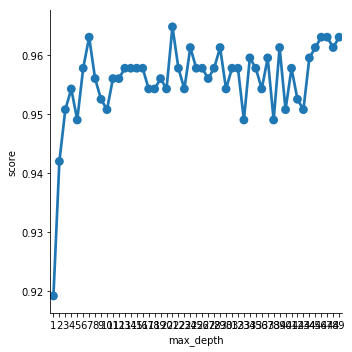

In [65]:
# Set n_estimators=57, optimise max_depth
gs = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(n_estimators=57),
    param_grid={
        'max_depth': np.arange(start=1, stop=50)
    },
    cv=5,
).fit(X, y)
grid = pd.DataFrame(gs.cv_results_['params'])
grid['score'] = gs.cv_results_['mean_test_score']
print(sns.catplot(x='max_depth', y='score', kind='point', data=grid))
print(gs.best_params_)
model = gs.best_estimator_.fit(X, y)
validate_model(model, X, y)

{'min_samples_leaf': 1}


0.9562344491471079

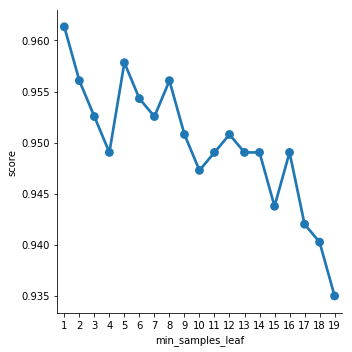

In [66]:
# Set max_depth=44, optimise min_samples_leaf
gs = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(n_estimators=57, max_depth=44),
    param_grid={
        'min_samples_leaf': np.arange(start=1, stop=20)
    },
    cv=5,
).fit(X, y)
grid = pd.DataFrame(gs.cv_results_['params'])
grid['score'] = gs.cv_results_['mean_test_score']
print(sns.catplot(x='min_samples_leaf', y='score', kind='point', data=grid))
print(gs.best_params_)
model = gs.best_estimator_.fit(X, y)
validate_model(model, X, y)

In [67]:
# Let's stop there, and evaluate our model
model = ensemble.RandomForestClassifier(n_estimators=57, max_depth=44, min_samples_leaf=1)
validate_model(model, X, y)

0.9574349108631525

## Model Summary
| Iteration | Model | Features | Accuracy (avg of three 5-fold CV) |
| -- | -- | -- | -- |
| 1 | Default: `RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_leaf=1)` | All | 95.21% |
| 2 | Default: `RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_leaf=1)` | Top 18 features chosen by RF feature importance | 96.44% |
| 3 | Tuned: `RandomForestClassifier(n_estimators=57, max_depth=44, min_samples_leaf=1)` | Top 18 features chosen by RF feature importance | 96.56% |